# Import needed modules and useful functions

In [1]:
#-- necessary modules --#
import numpy as np
np.random.seed(13)
import pandas as pd
import torch
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
import matplotlib as mpl
from scipy import integrate

#-- to computer fes --#
from mlcvs.utils.fes import compute_fes

#-- useful python script for training the DeepTICA cvs --#
from utils import *

#-- to not visualize warnings --#
import warnings
warnings.filterwarnings('ignore')

# Simulation parameters 

In [18]:
kb=0.008314
#-- SIMULATION PARAMETERS --#
sim_parameters = {
    'temp':300, 
    'beta': 1./(300*kb),
}
folder = "unbias_A/"
data = load_dataframe(folder+"COLVAR")
descriptors_names = data.filter(regex='^d[^a-z]').columns.values
data_complete = load_dataframe("angles/COLVAR")
X_complete = data_complete[descriptors_names].to_numpy()

# Different lags $\Delta \lambda$

In [3]:
#-- TRAINING PARAMETERS --#
n_output = 2
n_input = 45
train_parameters = {
              'descriptors': '^d[^a-z]',
              'nodes':[n_input,30,30,n_output], 
              'activ_type': 'tanh',
              'lag_time':5,
              'loss_type': 'sum', 
              'n_eig': n_output,
              'trainsize':0.7,
              'lrate':1e-3,
              'l2_reg':0.,
              'num_epochs':1000,
              'earlystop':True,
              'es_patience':100,
              'es_consecutive':False,
              'standardize_outputs':True,
              'standardize_inputs': True,
              'log_every':50,
              #if reweight the timescale
              "reweighting": False,
              }
#--------------------------------------#

In [4]:
lags = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,18,25]
timescale = np.empty(len(lags))
for i,lag in enumerate(lags):
    train_parameters["lag_time"] = lag
    print("lag time ", lag)
    torch.manual_seed(21)
    model,data,logweight,X = training(sim_parameters["beta"],folder+"COLVAR",train_parameters)

    #-- move the model back to cpu for convenience --# 
    model.to('cpu')

    #-- print some useful results --#
    print("timescales: ",model.tica.timescales(train_parameters["lag_time"]).detach().cpu().numpy()) 
    print("eigenvalues: ",model.tica.evals_.detach().cpu().numpy())
    print("gap: ", model.tica.evals_.detach().cpu().numpy()[0]-model.tica.evals_.detach().cpu().numpy()[1])
    timescale[i] = model.tica.evals_.detach().cpu().numpy()[0]-model.tica.evals_.detach().cpu().numpy()[1]

lag time  1
no weights
Time-lagged pairs:	 99998
Training data:		 69998
Validation data:	 30000
Epoch Train Loss  Valid Loss  Eigenvalues             
50    -1.225      -1.218      0.689  0.532  
100   -1.271      -1.269      0.695  0.575  
150   -1.288      -1.290      0.701  0.587  
200   -1.313      -1.314      0.709  0.604  
250   -1.345      -1.341      0.716  0.628  
300   -1.368      -1.363      0.733  0.634  
350   -1.397      -1.394      0.761  0.636  
400   -1.408      -1.407      0.771  0.637  
450   -1.413      -1.412      0.774  0.639  
500   -1.416      -1.415      0.776  0.640  
550   -1.419      -1.417      0.777  0.641  
600   -1.420      -1.418      0.778  0.642  
650   -1.423      -1.419      0.779  0.644  
INFO: Early stopping
688   -1.423      -1.419      0.780  0.644  
timescales:  [4.016343  2.2702541]
eigenvalues:  [0.77959347 0.6437278 ]
gap:  0.13586569
lag time  2
no weights
Time-lagged pairs:	 99997
Training data:		 69997
Validation data:	 30000
Epoch Train 

In [5]:
timescale2 = np.empty(len(lags))
for i,lag in enumerate(lags):
    train_parameters["lag_time"] = lag
    print("lag time ", lag)
    torch.manual_seed(501)
    model,data,logweight,X = training(sim_parameters["beta"],folder+"COLVAR",train_parameters)

    #-- move the model back to cpu for convenience --# 
    model.to('cpu')

    #-- print some useful results --#
    print("timescales: ",model.tica.timescales(train_parameters["lag_time"]).detach().cpu().numpy()) 
    print("eigenvalues: ",model.tica.evals_.detach().cpu().numpy())
    print("gap: ", model.tica.evals_.detach().cpu().numpy()[0]-model.tica.evals_.detach().cpu().numpy()[1])
    timescale2[i] = model.tica.evals_.detach().cpu().numpy()[0]-model.tica.evals_.detach().cpu().numpy()[1]

lag time  1
no weights
Time-lagged pairs:	 99998
Training data:		 69998
Validation data:	 30000
Epoch Train Loss  Valid Loss  Eigenvalues             
50    -1.277      -1.268      0.698  0.579  
100   -1.298      -1.288      0.703  0.594  
150   -1.319      -1.309      0.710  0.609  
200   -1.360      -1.349      0.730  0.628  
250   -1.397      -1.386      0.760  0.637  
300   -1.410      -1.398      0.770  0.639  
350   -1.414      -1.401      0.773  0.641  
400   -1.417      -1.404      0.775  0.643  
450   -1.420      -1.406      0.776  0.644  
500   -1.422      -1.407      0.777  0.645  
550   -1.425      -1.409      0.778  0.646  
600   -1.427      -1.410      0.779  0.647  
650   -1.429      -1.412      0.781  0.648  
INFO: Early stopping
667   -1.430      -1.412      0.781  0.649  
timescales:  [4.0449324 2.310006 ]
eigenvalues:  [0.7809666 0.6486258]
gap:  0.13234079
lag time  2
no weights
Time-lagged pairs:	 99997
Training data:		 69997
Validation data:	 30000
Epoch Train Lo

[0.13586569 0.22346467 0.24379191 0.30545962 0.30206177 0.25973284
 0.13291129 0.16532409 0.23450723 0.21570364 0.18451202 0.19603494
 0.17178601 0.11520645 0.10500558 0.09405354 0.02701694]


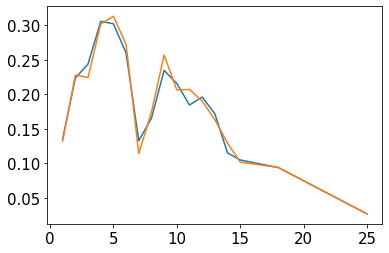

In [6]:
plt.plot(lags,timescale)
plt.plot(lags,timescale2)
print(timescale)

# Seed = 4045

## DeepTICA Analysis and Export

In [42]:
train_parameters["lag_time"] = 5
torch.manual_seed(4045)
model,data,logweight,X = training(sim_parameters["beta"],folder+"COLVAR",train_parameters)

#-- move the model back to cpu for convenience --# 
model.to('cpu')

#-- print some useful results --#
print("timescales: ",model.tica.timescales(train_parameters["lag_time"]).detach().cpu().numpy()) 
print("eigenvalues: ",model.tica.evals_.detach().cpu().numpy())
print("gap: ", model.tica.evals_.detach().cpu().numpy()[0]-model.tica.evals_.detach().cpu().numpy()[1])

no weights
Time-lagged pairs:	 99994
Training data:		 69995
Validation data:	 29999
Epoch Train Loss  Valid Loss  Eigenvalues             
50    -0.489      -0.489      0.432  0.055  
100   -0.553      -0.573      0.435  0.118  
150   -0.564      -0.581      0.438  0.126  
200   -0.585      -0.598      0.441  0.144  
250   -0.614      -0.624      0.446  0.167  
300   -0.628      -0.635      0.455  0.171  
350   -0.646      -0.652      0.471  0.174  
400   -0.656      -0.658      0.477  0.179  
INFO: Early stopping
420   -0.659      -0.660      0.478  0.180  
timescales:  [6.7742257 2.9200153]
eigenvalues:  [0.47802526 0.18044671]
gap:  0.29757854


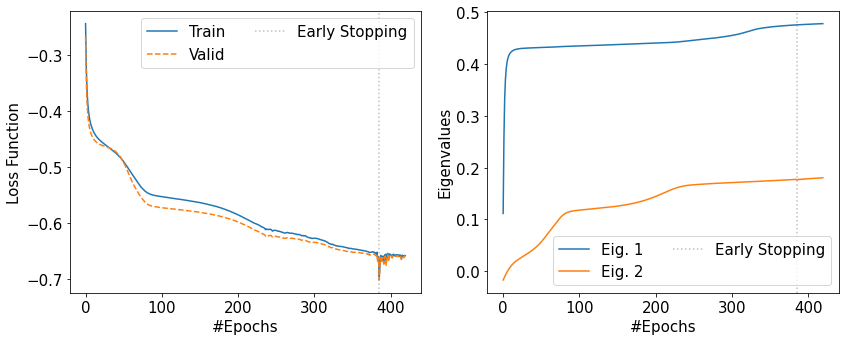

In [43]:
plot_model_lossfunction(model)

#### Adding to data the cvs values

In [44]:
data["cv1"] = np.transpose(model(torch.Tensor(X)).detach().cpu().numpy())[0]
data["cv2"] = np.transpose(model(torch.Tensor(X)).detach().cpu().numpy())[1]
data_complete["cv1"] = np.transpose(model(torch.Tensor(X_complete)).detach().cpu().numpy())[0]
data_complete["cv2"] = np.transpose(model(torch.Tensor(X_complete)).detach().cpu().numpy())[1]

<AxesSubplot:ylabel='Frequency'>

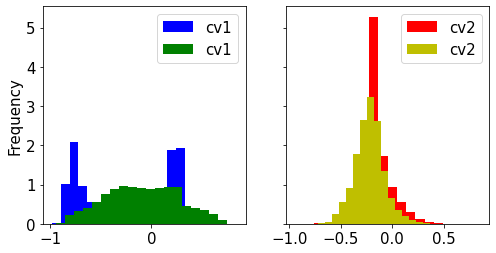

In [45]:
fig,axs = plt.subplots(1,2,figsize=(8,4),sharey=True)
data.plot.hist(y="cv1",bins=20,ax=axs[0],density=True,color="b")
data.plot.hist(y="cv2",bins=20,ax=axs[1],density=True,color="r")
data_complete.plot.hist(y="cv1",bins=20,ax=axs[0],density=True,color="g")
data_complete.plot.hist(y="cv2",bins=20,ax=axs[1],density=True,color="y")

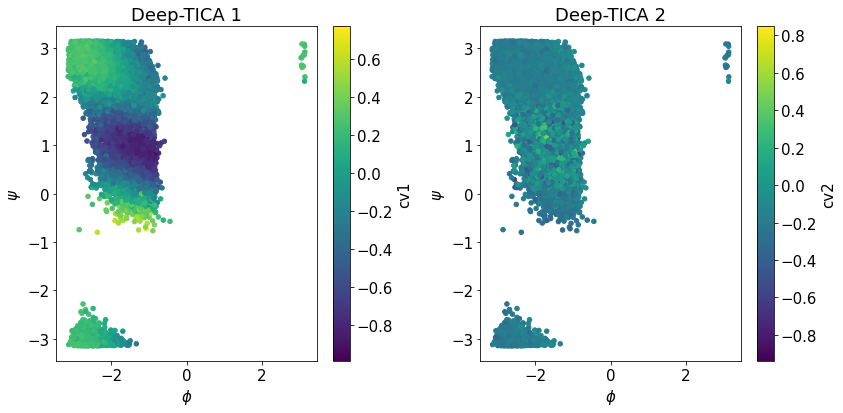

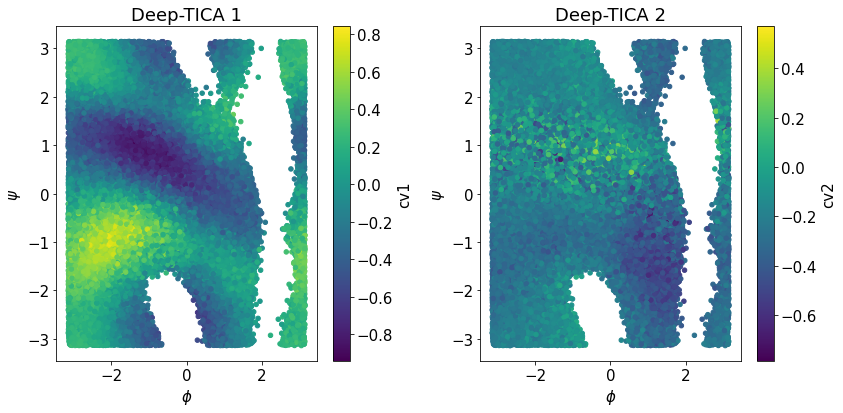

In [46]:
fig,axs = plt.subplots(1,2,figsize=(12,6))
for k,ax in enumerate(axs):
    data.plot.scatter(y="psi",x="phi",c="cv"+str(k+1),cmap="viridis",ax=ax)
    ax.set_xlabel(r"$\phi$")
    ax.set_ylabel(r"$\psi$")
    ax.set_title('Deep-TICA '+str(k+1))
plt.tight_layout()
fig,axs = plt.subplots(1,2,figsize=(12,6))
for k,ax in enumerate(axs):
    data_complete.plot.scatter(y="psi",x="phi",c="cv"+str(k+1),cmap="viridis",ax=ax)
    ax.set_xlabel(r"$\phi$")
    ax.set_ylabel(r"$\psi$")
    ax.set_title('Deep-TICA '+str(k+1))
plt.tight_layout()

### Orthogonality  
We said that the **ICs** must satisfy two conditions. The first one is that they are uncorrelated, which means that $\int d \vec x \psi_1(\vec x) \psi_2(\vec x) e^{-\beta U(\vec x)} = 0$.  
But their scalar product on the data will lead to a slightly different result, in this case approximately $0$, but not perfectly $0$

In [47]:
Boltzmann_product(model,model,X,j=0,k=1)

0.02310041401307699

# Seed = 21

## DeepTICA Analysis and Export

In [48]:
torch.manual_seed(21)
model,data,logweight,X = training(sim_parameters["beta"],folder+"COLVAR",train_parameters)

#-- move the model back to cpu for convenience --# 
model.to('cpu')

#-- print some useful results --#
print("timescales: ",model.tica.timescales(train_parameters["lag_time"]).detach().cpu().numpy()) 
print("eigenvalues: ",model.tica.evals_.detach().cpu().numpy())
print("gap: ", model.tica.evals_.detach().cpu().numpy()[0]-model.tica.evals_.detach().cpu().numpy()[1])

no weights
Time-lagged pairs:	 99994
Training data:		 69995
Validation data:	 29999
Epoch Train Loss  Valid Loss  Eigenvalues             
50    -0.531      -0.552      0.432  0.098  
100   -0.556      -0.580      0.435  0.121  
150   -0.568      -0.589      0.439  0.128  
200   -0.610      -0.620      0.449  0.153  
250   -0.636      -0.643      0.464  0.171  
300   -0.648      -0.651      0.474  0.174  
350   -0.658      -0.657      0.478  0.176  
INFO: Early stopping
366   -0.658      -0.655      0.479  0.177  
timescales:  [6.801656  2.8911543]
eigenvalues:  [0.47945026 0.17738849]
gap:  0.30206177


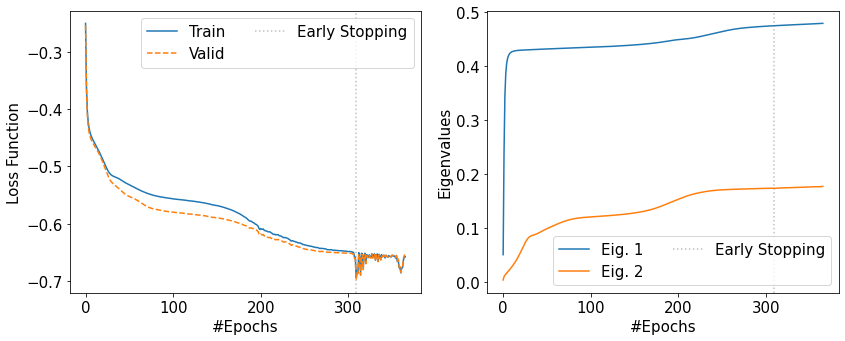

In [49]:
plot_model_lossfunction(model)

#### Adding to data the cvs values

In [50]:
data["cv1"] = np.transpose(model(torch.Tensor(X)).detach().cpu().numpy())[0]
data["cv2"] = np.transpose(model(torch.Tensor(X)).detach().cpu().numpy())[1]
data_complete["cv1"] = np.transpose(model(torch.Tensor(X_complete)).detach().cpu().numpy())[0]
data_complete["cv2"] = np.transpose(model(torch.Tensor(X_complete)).detach().cpu().numpy())[1]

<AxesSubplot:ylabel='Frequency'>

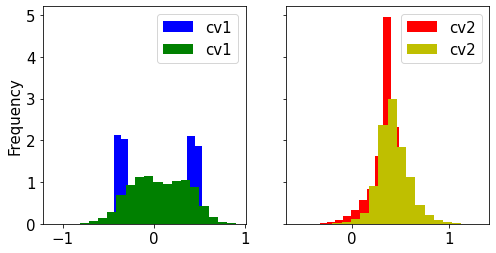

In [51]:
fig,axs = plt.subplots(1,2,figsize=(8,4),sharey=True)
data.plot.hist(y="cv1",bins=20,ax=axs[0],density=True,color="b")
data.plot.hist(y="cv2",bins=20,ax=axs[1],density=True,color="r")
data_complete.plot.hist(y="cv1",bins=20,ax=axs[0],density=True,color="g")
data_complete.plot.hist(y="cv2",bins=20,ax=axs[1],density=True,color="y")

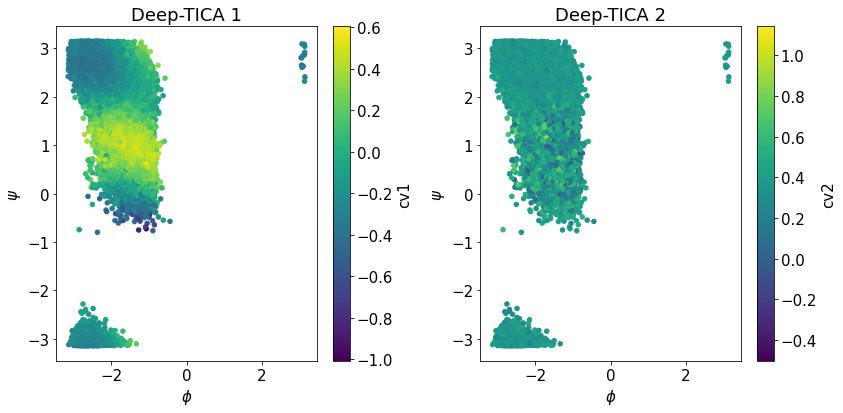

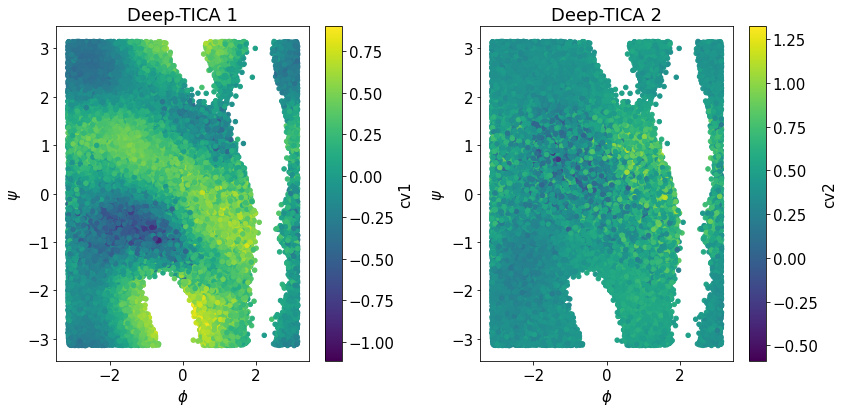

In [52]:
fig,axs = plt.subplots(1,2,figsize=(12,6))
for k,ax in enumerate(axs):
    data.plot.scatter(y="psi",x="phi",c="cv"+str(k+1),cmap="viridis",ax=ax)
    ax.set_xlabel(r"$\phi$")
    ax.set_ylabel(r"$\psi$")
    ax.set_title('Deep-TICA '+str(k+1))
plt.tight_layout()
fig,axs = plt.subplots(1,2,figsize=(12,6))
for k,ax in enumerate(axs):
    data_complete.plot.scatter(y="psi",x="phi",c="cv"+str(k+1),cmap="viridis",ax=ax)
    ax.set_xlabel(r"$\phi$")
    ax.set_ylabel(r"$\psi$")
    ax.set_title('Deep-TICA '+str(k+1))
plt.tight_layout()

### Orthogonality  
We said that the **ICs** must satisfy two conditions. The first one is that they are uncorrelated, which means that $\int d \vec x \psi_1(\vec x) \psi_2(\vec x) e^{-\beta U(\vec x)} = 0$.  
But their scalar product on the data will lead to a slightly different result, in this case approximately $0$, but not perfectly $0$

In [53]:
Boltzmann_product(model,model,X,j=0,k=1)

0.0007440607796258857

# seed = 151

## DeepTICA Analysis and Export

In [54]:
torch.manual_seed(151)
model,data,logweight,X = training(sim_parameters["beta"],folder+"COLVAR",train_parameters)

#-- move the model back to cpu for convenience --# 
model.to('cpu')

#-- print some useful results --#
print("timescales: ",model.tica.timescales(train_parameters["lag_time"]).detach().cpu().numpy()) 
print("eigenvalues: ",model.tica.evals_.detach().cpu().numpy())
print("gap: ", model.tica.evals_.detach().cpu().numpy()[0]-model.tica.evals_.detach().cpu().numpy()[1])

no weights
Time-lagged pairs:	 99994
Training data:		 69995
Validation data:	 29999
Epoch Train Loss  Valid Loss  Eigenvalues             
50    -0.553      -0.545      0.435  0.116  
100   -0.566      -0.558      0.440  0.125  
150   -0.587      -0.573      0.447  0.138  
200   -0.629      -0.613      0.460  0.168  
250   -0.652      -0.638      0.473  0.175  
300   -0.661      -0.644      0.478  0.180  
INFO: Early stopping
301   -0.664      -0.647      0.478  0.180  
timescales:  [6.7718744 2.913495 ]
eigenvalues:  [0.47790277 0.17975654]
gap:  0.29814625


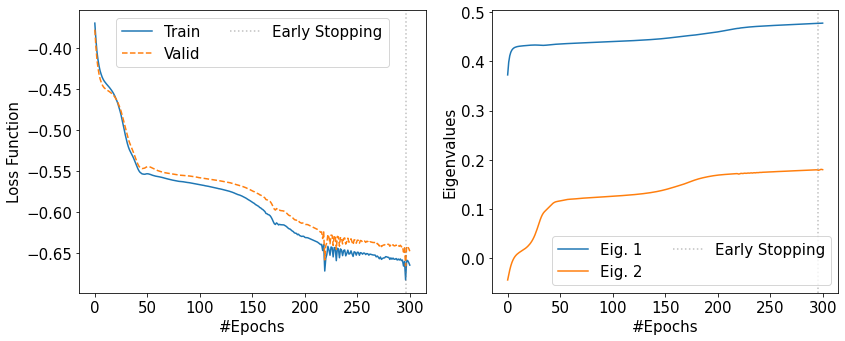

In [55]:
plot_model_lossfunction(model)

#### Adding to data the cvs values

In [56]:
data["cv1"] = np.transpose(model(torch.Tensor(X)).detach().cpu().numpy())[0]
data["cv2"] = np.transpose(model(torch.Tensor(X)).detach().cpu().numpy())[1]
data_complete["cv1"] = np.transpose(model(torch.Tensor(X_complete)).detach().cpu().numpy())[0]
data_complete["cv2"] = np.transpose(model(torch.Tensor(X_complete)).detach().cpu().numpy())[1]

<AxesSubplot:ylabel='Frequency'>

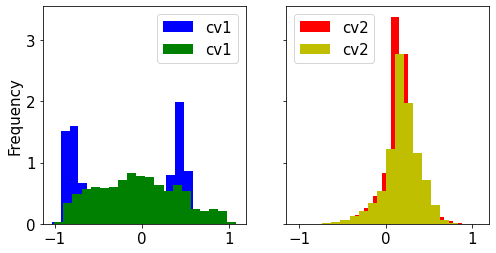

In [57]:
fig,axs = plt.subplots(1,2,figsize=(8,4),sharey=True)
data.plot.hist(y="cv1",bins=20,ax=axs[0],density=True,color="b")
data.plot.hist(y="cv2",bins=20,ax=axs[1],density=True,color="r")
data_complete.plot.hist(y="cv1",bins=20,ax=axs[0],density=True,color="g")
data_complete.plot.hist(y="cv2",bins=20,ax=axs[1],density=True,color="y")

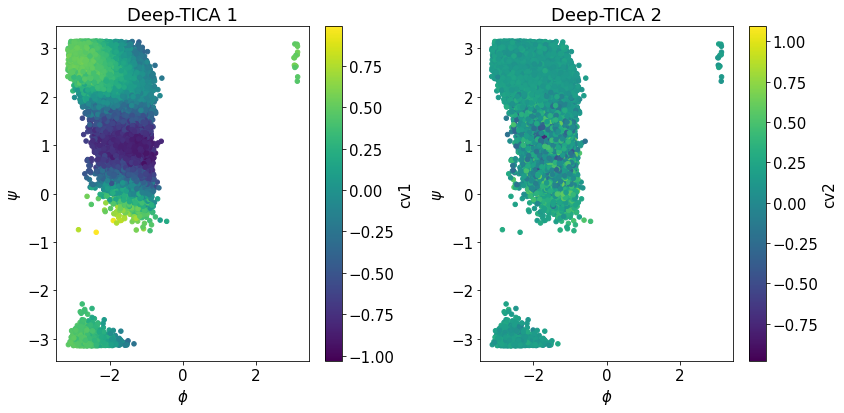

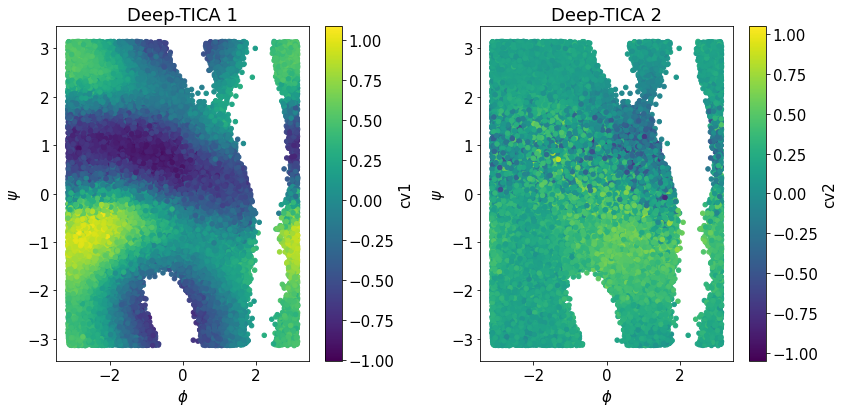

In [58]:
fig,axs = plt.subplots(1,2,figsize=(12,6))
for k,ax in enumerate(axs):
    data.plot.scatter(y="psi",x="phi",c="cv"+str(k+1),cmap="viridis",ax=ax)
    ax.set_xlabel(r"$\phi$")
    ax.set_ylabel(r"$\psi$")
    ax.set_title('Deep-TICA '+str(k+1))
plt.tight_layout()
fig,axs = plt.subplots(1,2,figsize=(12,6))
for k,ax in enumerate(axs):
    data_complete.plot.scatter(y="psi",x="phi",c="cv"+str(k+1),cmap="viridis",ax=ax)
    ax.set_xlabel(r"$\phi$")
    ax.set_ylabel(r"$\psi$")
    ax.set_title('Deep-TICA '+str(k+1))
plt.tight_layout()

### Orthogonality  
We said that the **ICs** must satisfy two conditions. The first one is that they are uncorrelated, which means that $\int d \vec x \psi_1(\vec x) \psi_2(\vec x) e^{-\beta U(\vec x)} = 0$.  
But their scalar product on the data will lead to a slightly different result, in this case approximately $0$, but not perfectly $0$

In [59]:
Boltzmann_product(model,model,X,j=0,k=1)

-0.03093826626488017

# Seed = 500

## DeepTICA Analysis and Export

In [60]:
torch.manual_seed(500)
model,data,logweight,X = training(sim_parameters["beta"],folder+"COLVAR",train_parameters)

#-- move the model back to cpu for convenience --# 
model.to('cpu')

#-- print some useful results --#
print("timescales: ",model.tica.timescales(train_parameters["lag_time"]).detach().cpu().numpy()) 
print("eigenvalues: ",model.tica.evals_.detach().cpu().numpy())
print("gap: ", model.tica.evals_.detach().cpu().numpy()[0]-model.tica.evals_.detach().cpu().numpy()[1])

no weights
Time-lagged pairs:	 99994
Training data:		 69995
Validation data:	 29999
Epoch Train Loss  Valid Loss  Eigenvalues             
50    -0.531      -0.526      0.436  0.089  
100   -0.568      -0.566      0.439  0.128  
150   -0.607      -0.604      0.446  0.156  
200   -0.644      -0.639      0.470  0.173  
250   -0.658      -0.654      0.479  0.176  
INFO: Early stopping
300   -0.666      -0.660      0.483  0.179  
timescales:  [6.876478 2.911066]
eigenvalues:  [0.48330063 0.17949934]
gap:  0.3038013


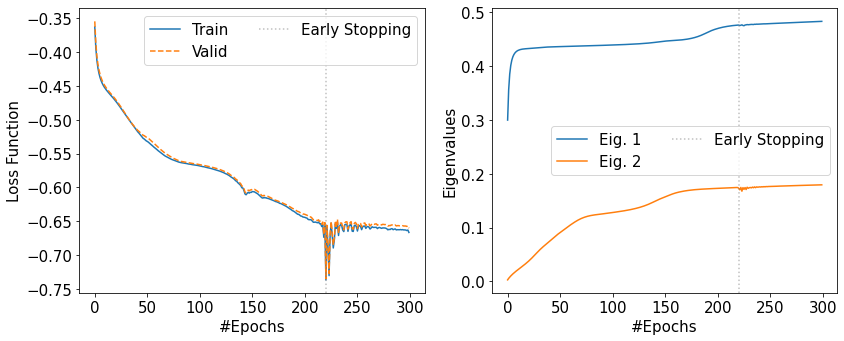

In [61]:
plot_model_lossfunction(model)

#### Adding to data the cvs values

In [62]:
data["cv1"] = np.transpose(model(torch.Tensor(X)).detach().cpu().numpy())[0]
data["cv2"] = np.transpose(model(torch.Tensor(X)).detach().cpu().numpy())[1]
data_complete["cv1"] = np.transpose(model(torch.Tensor(X_complete)).detach().cpu().numpy())[0]
data_complete["cv2"] = np.transpose(model(torch.Tensor(X_complete)).detach().cpu().numpy())[1]

<AxesSubplot:ylabel='Frequency'>

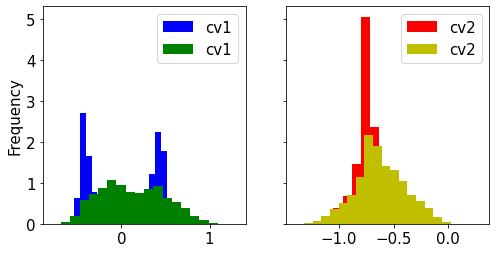

In [63]:
fig,axs = plt.subplots(1,2,figsize=(8,4),sharey=True)
data.plot.hist(y="cv1",bins=20,ax=axs[0],density=True,color="b")
data.plot.hist(y="cv2",bins=20,ax=axs[1],density=True,color="r")
data_complete.plot.hist(y="cv1",bins=20,ax=axs[0],density=True,color="g")
data_complete.plot.hist(y="cv2",bins=20,ax=axs[1],density=True,color="y")

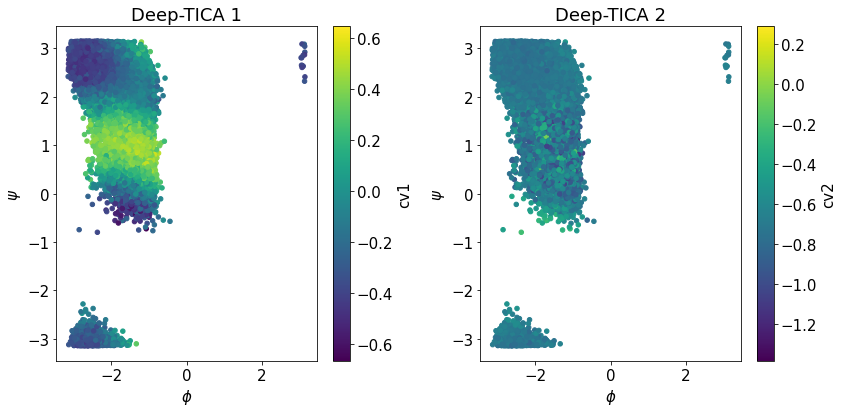

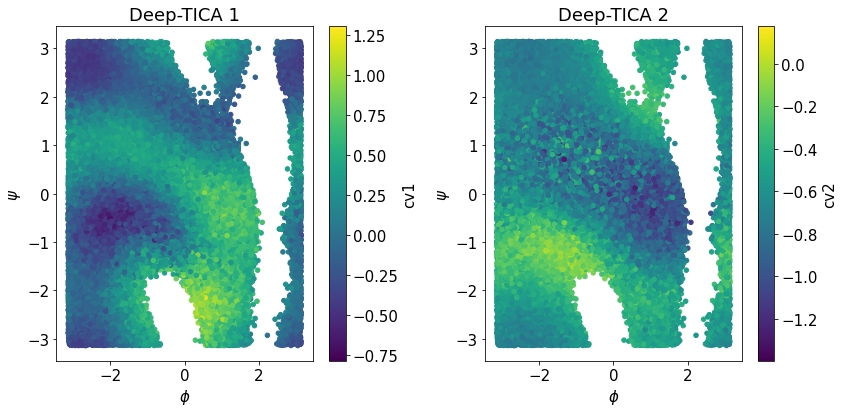

In [64]:
fig,axs = plt.subplots(1,2,figsize=(12,6))
for k,ax in enumerate(axs):
    data.plot.scatter(y="psi",x="phi",c="cv"+str(k+1),cmap="viridis",ax=ax)
    ax.set_xlabel(r"$\phi$")
    ax.set_ylabel(r"$\psi$")
    ax.set_title('Deep-TICA '+str(k+1))
plt.tight_layout()
fig,axs = plt.subplots(1,2,figsize=(12,6))
for k,ax in enumerate(axs):
    data_complete.plot.scatter(y="psi",x="phi",c="cv"+str(k+1),cmap="viridis",ax=ax)
    ax.set_xlabel(r"$\phi$")
    ax.set_ylabel(r"$\psi$")
    ax.set_title('Deep-TICA '+str(k+1))
plt.tight_layout()

### Orthogonality  
We said that the **ICs** must satisfy two conditions. The first one is that they are uncorrelated, which means that $\int d \vec x \psi_1(\vec x) \psi_2(\vec x) e^{-\beta U(\vec x)} = 0$.  
But their scalar product on the data will lead to a slightly different result, in this case approximately $0$, but not perfectly $0$

In [65]:
Boltzmann_product(model,model,X,j=0,k=1)

-0.009330140221920129